In [2]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
x = reshape(x,(2,3,2))
x

x = [1,2]
2x
2x.+1

2-element Vector{Int64}:
 3
 5

In [3]:
f(x) = x^2 + 2x + 1 + exp(x) + sin(x) - exp(*x) /(x^3 + 2x +x^2)
x = -5:0.1:5
y = @.f(x)

101-element Vector{Float64}:
 16.0
 15.210000000000004
 14.44
 13.690000000000003
 12.959999999999997
 12.25
 11.560000000000002
 10.889999999999999
 10.24
  9.61
  ⋮
 27.04
 28.089999999999996
 29.160000000000004
 30.25
 31.359999999999996
 32.49
 33.64
 34.81
 36.0

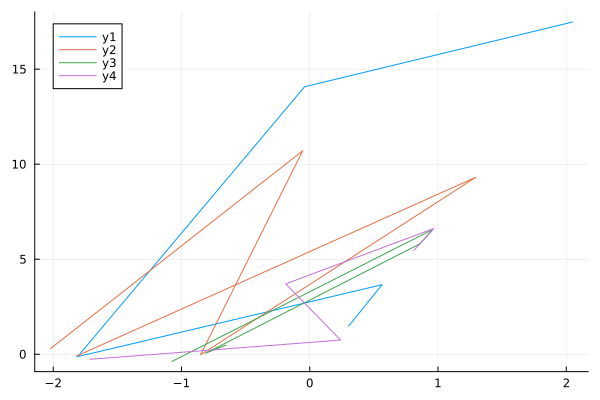

In [2]:
using Plots
using Random
f(x) = x^2 + 2x + 1 + exp(x) + sin(x) - exp(x) /(x^3 + 2x +x^2)
x = randn(5,4)
y = @.f(x)
plot(x,y)

In [12]:
a = [1,2]
b = [3,4]
a' * b

11

In [13]:
m = 1e7
a = randn(Int(m))
b = randn(Int(m))
@time a' * b


  0.020273 seconds (14.91 k allocations: 1.043 MiB, 75.49% compilation time)


-623.3408063380225

In [4]:
import numpy as np
m = 10000
a = np.random.randn(m)
b = np.random.randn(m)
c = np.zeros(m)
from time import time
t1 = time()
# for i in range(m):
#     c[i] = a[i] * b[i]

d = a@b
t2 =time()

t = t2 - t1
print(t)

0.0017580986022949219


In [2]:
m = 10000
a = randn(m,m)
@time a * a

 17.085204 seconds (1.36 M allocations: 855.688 MiB, 0.20% gc time, 3.19% compilation time)


10000×10000 Matrix{Float64}:
   64.5072    24.5671     53.4635    …   199.015    120.286    289.065
   22.6807    78.7899    -54.3396        -93.4367    45.1881   -64.6754
   67.5838    24.2909   -150.568        -135.596   -149.361    -23.8043
  127.35      29.8595     92.9933       -139.9      -87.2236   -38.3201
  198.542    -46.0197   -186.511         -51.1843   155.568     36.3833
  -96.8803   -12.3478     32.195     …    41.1343    76.4119  -178.067
  -50.122    -28.8674    -31.1054         29.5066   111.632    -93.7777
   13.391     37.9076      4.99139       164.07     159.277    126.013
  -17.4366   193.095    -181.218          15.9322   -91.7277   -91.9926
   46.2964    59.5887     32.627        -156.192   -152.84    -188.25
    ⋮                                ⋱                        
 -115.745     24.9592     -0.371612     -135.824    -77.5329  -109.173
 -122.254     24.2319   -112.362        -102.904   -100.541     79.1072
   51.7316  -105.16     -132.041         -36.8974 

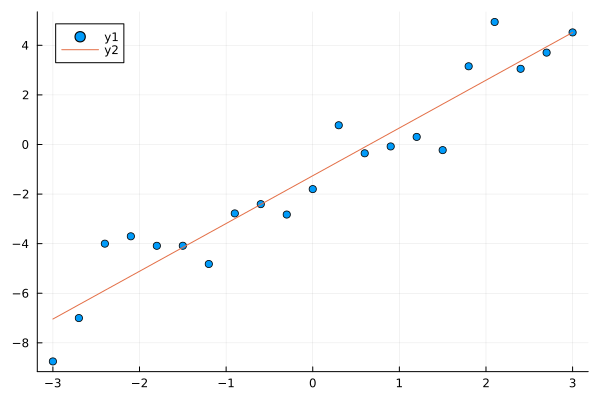

In [2]:
using Plots
x = -3:0.3:3
m = length(x)
y = 2x.-1
y += 1.2 * randn(m)
scatter(x,y)
function loop(x,y)
    m = length(x)
    w,b = 0,0  
    η = 0.01
    for i = 1:100
        error = w.*x .+ b - y;gw = x' * error
        gb = sum(error);w -= η *gw;b -= η *gb
    end
    w,b
end
w,b=loop(x,y)
plot!(x,w.*x .+ b)


In [1]:
f(x) = x' * x
function g(α;x,p)
    t = x + α * p;f(t)
end


α = -2:0.01:2
x = [1,2];p = [0.5,0.7]
y = zeros(length(α))
for i = 1:length(α)
    y[i] = g(α[i];x;p)
end



ErrorException: syntax: more than one semicolon in argument list around d:\code\大三课程\最优化方法\ayang.ipynb:11

┌ Info: Saved animation to d:\code\大三课程\最优化方法\gradient_descent.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\gradient_descent.gif")
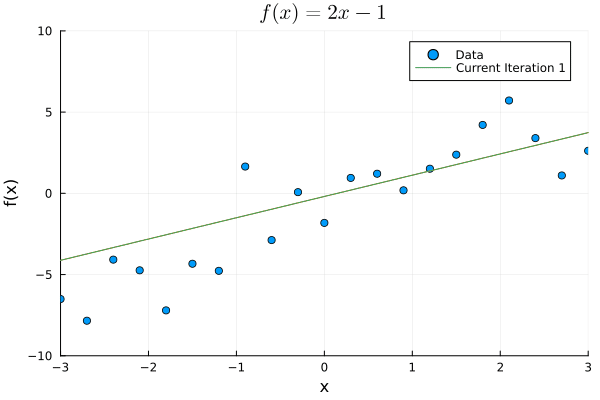

In [2]:
using Plots

x = -3:0.3:3
m = length(x)
y = 2x .- 1
y += 1.5 * randn(m)
scatter(x, y, label="Data")

function loop(x, y)
    m = length(x)
    w, b = 0, 0
    η = 0.01
    # 存储每一步的参数值
    w_history, b_history = Float64[], Float64[]
    # 创建动画对象
    anim = @animate for i in 1:100
        error = w .* x .+ b .- y
        gw = x' * error
        gb = sum(error)
        w -= η * gw
        b -= η * gb
        
        # 存储当前的参数值
        push!(w_history, w)
        push!(b_history, b)
        
        # 清空之前的图像，只保留数据点
        plot(x, y, seriestype = :scatter, label="Data")
        
        # 绘制之前的拟合线
        for j in 1:i
            plot!(x, w_history[j] .* x .+ b_history[j], label="", legend=false)
        end
        # 绘制当前拟合线
        plot!(x, w .* x .+ b, label="Current Iteration $i", legend=:topright, xlims=(-3, 3), ylims=(-10, 10))
        xlabel!("x")
        ylabel!("f(x)")
        title!("\$f(x) = 2x - 1\$")
    end
    
    gif(anim, "gradient_descent.gif", fps = 10)
end
loop(x, y)